In [1]:
from fastai import *
from fastai.vision import *

path = './'

arch = models.resnet50
src = ImageList.from_csv(path, 'tag_labels_6000.csv').split_by_rand_pct(0.1, seed=15)
with open('class_names.pkl','rb') as f: classes = pickle.load(f).index.tolist()
src = src.label_from_df(label_delim=' ', classes=classes)

In [2]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.15, max_warp=0.1)

def get_data(bs, size, stats=None):
    if stats == None:
        data = (src.transform(tfms, size=size)
               .databunch(bs=bs).normalize())
    else:
        print("Using stats ", stats)
        data = (src.transform(tfms, size=size)
               .databunch(bs=bs).normalize(stats))
    return data

In [3]:
data = get_data(128, 64)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


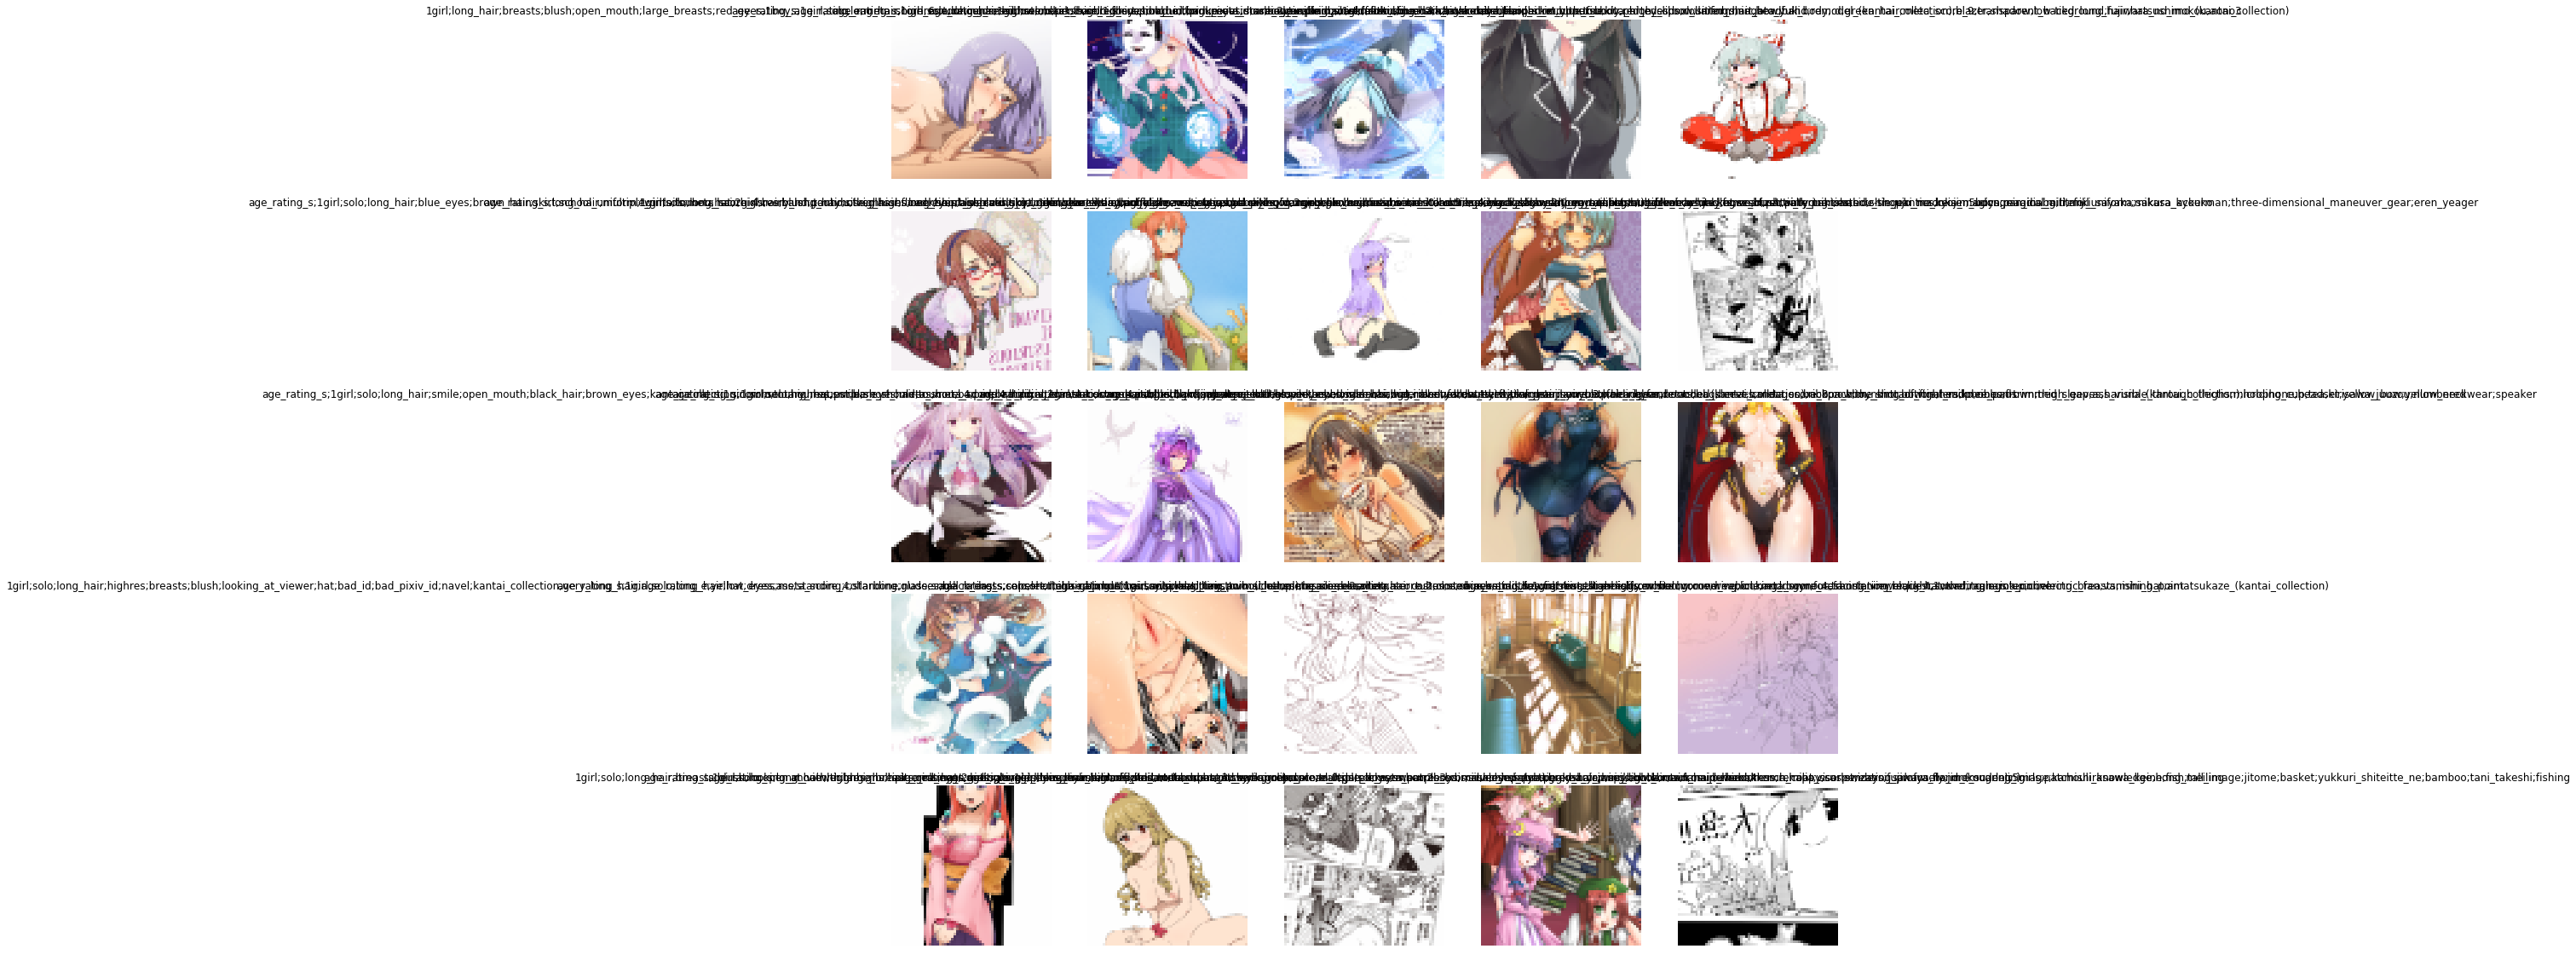

In [4]:
data.show_batch()